[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Dataset Shape: (300, 2)
                           text sentiment
0           Regret buying this.  Negative
1  Not happy with the purchase.  Negative
2            This is fantastic!  Positive
3        Worst experience ever.  Negative
4                This is awful!  Negative

Sample Preprocessed Tweet:
 regret buying

Accuracy: 0.9833333333333333

Classification Report:
               precision    recall  f1-score   support

    Negative       0.93      1.00      0.97        14
     Neutral       1.00      1.00      1.00        24
    Positive       1.00      0.95      0.98        22

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



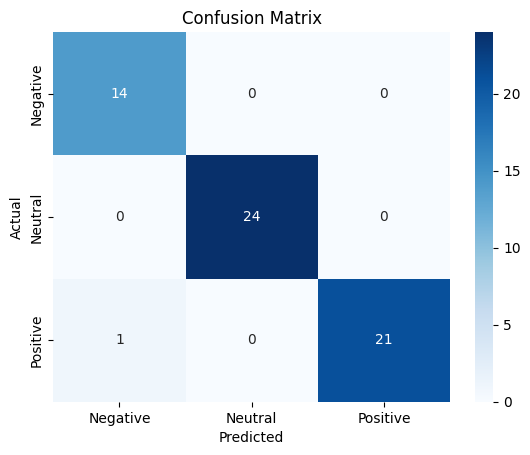


Prediction Examples:
Tweet: 'I love this new phone!' -> Positive
Tweet: 'This service is terrible and disappointing' -> Negative


In [25]:
#Import Libraries
import pandas as pd
import numpy as np
import re
import string
# NLP Libraries
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
# ML Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')
# ---------------------------
# Load Dataset
# ---------------------------
# Example: CSV file with columns: "text", "sentiment"
# Sentiment labels: Positive, Negative, Neutral
df = pd.read_csv("/content/twitter_sentiment_300.csv")
print("Dataset Shape:", df.shape)
print(df.head())
# ---------------------------
# Text Preprocessing
# ---------------------------
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
def preprocess(text):
    text = str(text).lower() # Lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", '', text) # Remove URLs
    text = re.sub(r'@\w+|\#','', text) # Remove @mentions & hashtags
    text = re.sub(r'[^A-Za-z\s]', '', text) # Remove numbers, punctuation
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)
df['clean_text'] = df['text'].apply(preprocess)
print("\nSample Preprocessed Tweet:\n", df['clean_text'].iloc[0])
# ---------------------------
# Feature Extraction
# ---------------------------
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_text']).toarray()
y = df['sentiment']
# ---------------------------
# Train-Test Split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# ---------------------------
# Model Training
# ---------------------------
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
# ---------------------------
# Evaluation
y_pred = model.predict(X_test)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_,
yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
# ---------------------------
# Predict Sentiment for New Tweets
# ---------------------------
def predict_sentiment(tweet):
    cleaned = preprocess(tweet)
    vectorized = vectorizer.transform([cleaned]).toarray()
    prediction = model.predict(vectorized)[0]
    return prediction
# Example Predictions
print("\nPrediction Examples:")
print("Tweet: 'I love this new phone!' ->", predict_sentiment("I love this new phone!"))
print("Tweet: 'This service is terrible and disappointing' ->", predict_sentiment("This service is terrible and disappointing"))